In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women) #verificando quantas mulheres sobreviveram nos dados de treino

% of women who survived: 0.7420382165605095


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='Age'>

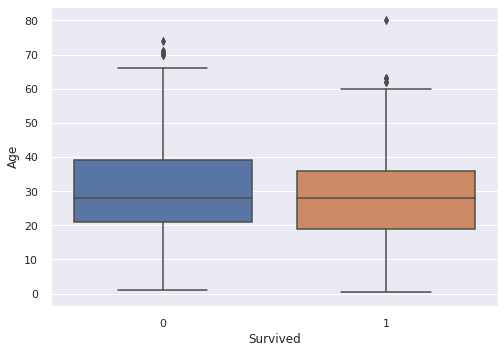

In [6]:
sns.boxplot(data=train_data, x="Survived", y="Age") #exibindo grafico de sobreviventes por idade

In [7]:
(train_data
 .groupby("Survived")
 .agg({"Age": ["min", "max"]})) #descobrindo a idade mínima e máxima de quem sobreviveu e quem não

Age      
           min   max
Survived            
0         1.00  74.0
1         0.42  80.0

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

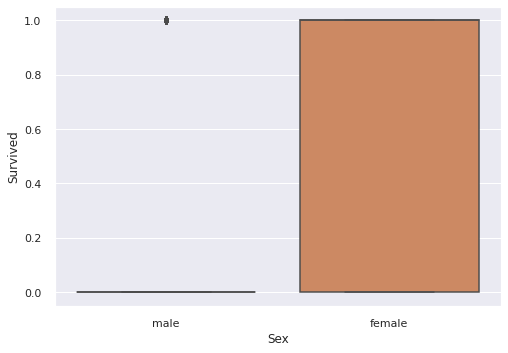

In [8]:
sns.boxplot(data=train_data, x="Sex", y="Survived") #exibindo grafico de sobreviventes por sexo

In [9]:
train_data["Survived"].value_counts(normalize=True) #verificando quantas pessoas sobreviveram nos dados de treino e quantas morreram

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [10]:
train_data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [11]:
train_data.duplicated(subset=["Survived","Pclass","Name","Sex", "Age", "SibSp", "Parch","Ticket","Fare","Cabin", "Embarked"]).sum() #verificando se há duplicadas

0

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_data["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
E101           3
              ..
D49            1
B102           1
B42            1
B3             1
C101           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
train_data["Cabin"] = train_data["Cabin"].fillna("SEM CABINE")
test_data["Cabin"] = test_data["Cabin"].fillna("SEM CABINE")

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,SEM CABINE,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,SEM CABINE,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,SEM CABINE,S


In [16]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

train_data.loc[:,"Age_imp"] = my_imputer.fit_transform(train_data.loc[:,["Age"]])
test_data.loc[:,"Age_imp"] = my_imputer.fit_transform(test_data.loc[:,["Age"]])
#train_data["Age"]=

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

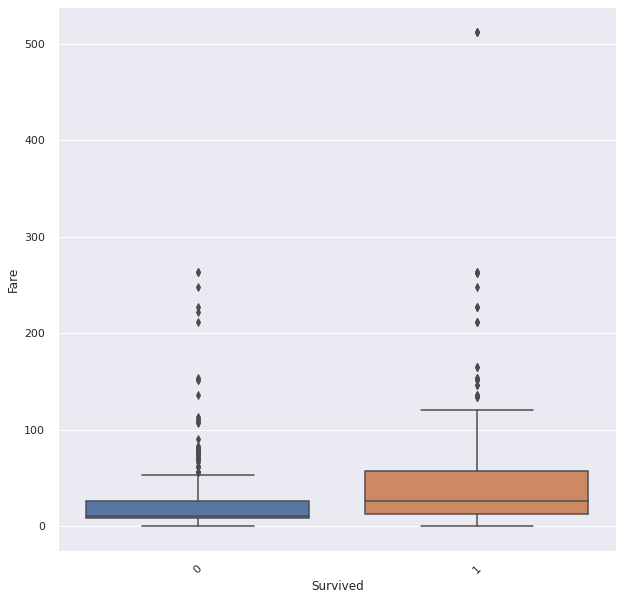

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train_data[["Survived","Fare"]], y="Fare", x="Survived")
plt.xticks(rotation =45)

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

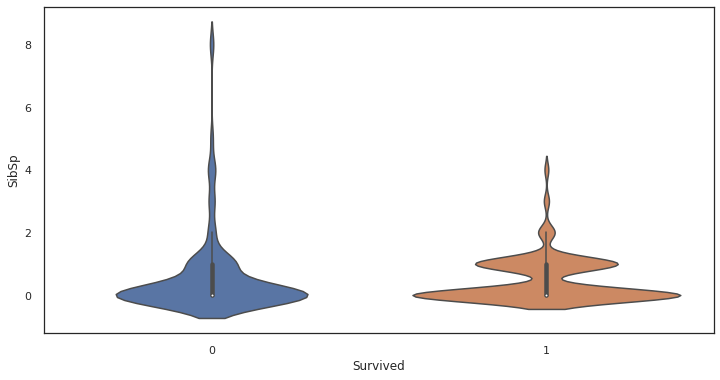

In [18]:
sns.set_style("white")
plt.figure(figsize=(12,6))
sns.violinplot(data=train_data, x = "Survived", y= "SibSp")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

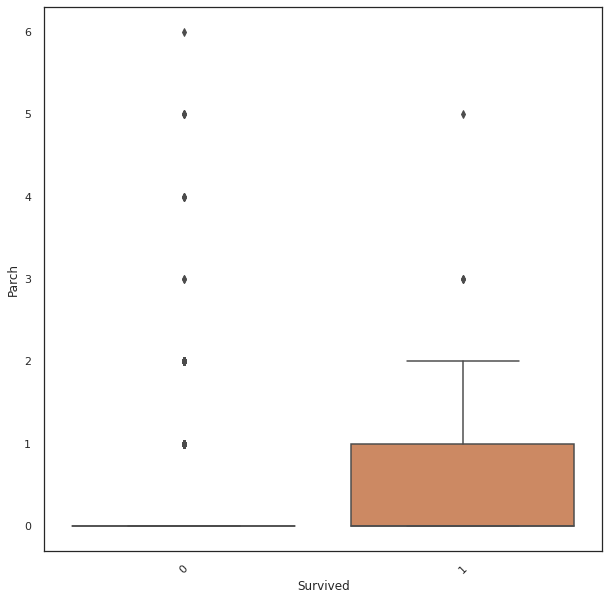

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train_data[["Survived","Parch"]], y="Parch", x="Survived")
plt.xticks(rotation =45)

In [20]:
def removendo_outliers (df,feat):
    q1, q3 = df[feat].quantile([.25,.75])
    iqr = q3 - q1
    lower_bound = max(q1-1.5*iqr,0)
    upper_bound = (q3+1.5*iqr)
    len_before = (~df[feat].isnull()).sum()
    df[~df[feat].between(lower_bound,upper_bound)] = np.nan
    len_after = (~df[feat].isnull()).sum()
    print (f"Removidos {(1 -(len_after/len_before))*100}% dos dados")
    return df

<AxesSubplot:>

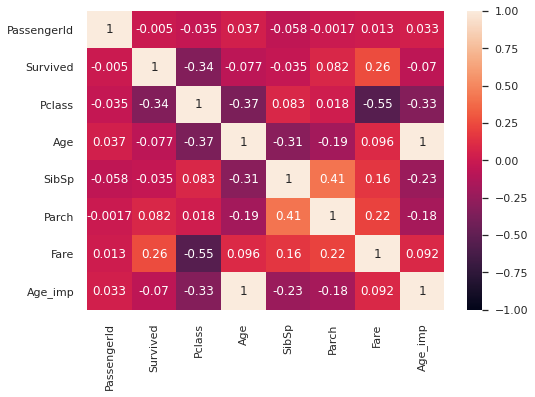

In [21]:
sns.heatmap(train_data.corr(), annot=True, vmin=-1, vmax=1) 

In [22]:
y = train_data["Survived"]

features = ["Pclass", "SibSp", "Parch","Age_imp","Fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [23]:
train_data["Age_imp"]=removendo_outliers(train_data,"Age_imp")
train_data["SibSp"]=removendo_outliers(train_data,"SibSp")
train_data["Fare"]=removendo_outliers(train_data,"Fare")

Removidos 7.4074074074074066% dos dados
Removidos 4.727272727272725% dos dados
Removidos 12.977099236641221% dos dados


In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Age_imp      418 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

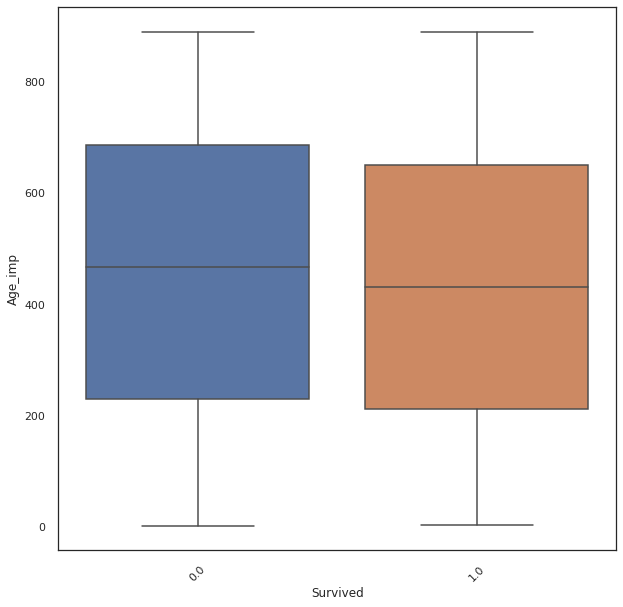

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train_data[["Survived","Age_imp"]], y="Age_imp", x="Survived")
plt.xticks(rotation =45) #verificando se funcionou

In [26]:
train_data.describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  684 non-null    float64
 1   Survived     684 non-null    float64
 2   Pclass       684 non-null    float64
 3   Name         684 non-null    object 
 4   Sex          684 non-null    object 
 5   Age          526 non-null    float64
 6   SibSp        684 non-null    object 
 7   Parch        684 non-null    float64
 8   Ticket       684 non-null    object 
 9   Fare         684 non-null    object 
 10  Cabin        684 non-null    object 
 11  Embarked     684 non-null    object 
 12  Age_imp      684 non-null    object 
dtypes: float64(5), object(8)
memory usage: 90.6+ KB


In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, stratify=y, shuffle=True)

In [28]:
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve, plot_ks_statistic
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=20)
clf = clf.fit(X,y)
y_pred_clf = clf.predict(X_valid)
print(classification_report(y_valid, y_pred_clf))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       165
           1       0.68      0.54      0.61       103

    accuracy                           0.73       268
   macro avg       0.72      0.69      0.70       268
weighted avg       0.72      0.73      0.72       268



In [30]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)

model.fit(X,y)
y_pred_kneigh= model.predict(X_valid)
#print(X_test,y_pred_kneigh)
print(classification_report(y_valid, y_pred_kneigh))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       165
           1       0.75      0.70      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [31]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model2.fit(X, y)
y_pred_rndForest = model.predict(X_valid)
print(classification_report(y_valid, y_pred_rndForest))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       165
           1       0.75      0.70      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [32]:
y_pred=[y_pred_clf, y_pred_kneigh, y_pred_rndForest]

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

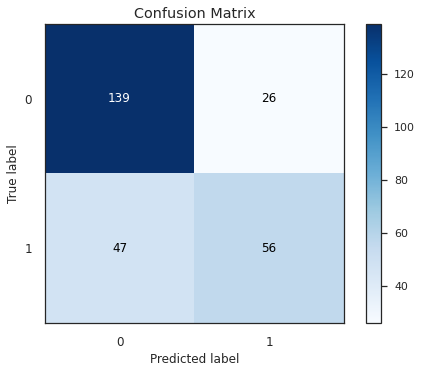

In [33]:
plot_confusion_matrix(y_valid, y_pred[0])

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

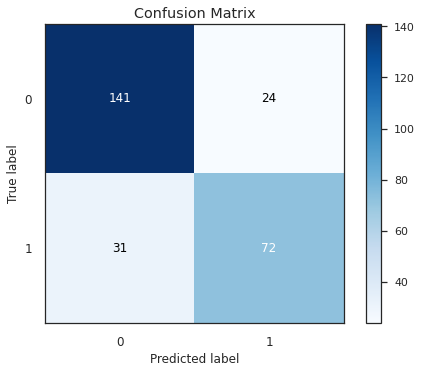

In [34]:
plot_confusion_matrix(y_valid, y_pred[1])

In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   418 non-null    int64  
 1   SibSp    418 non-null    int64  
 2   Parch    418 non-null    int64  
 3   Age_imp  418 non-null    float64
 4   Fare     417 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [36]:
X_test = X_test.fillna(X_test.mean())

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   418 non-null    int64  
 1   SibSp    418 non-null    int64  
 2   Parch    418 non-null    int64  
 3   Age_imp  418 non-null    float64
 4   Fare     418 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

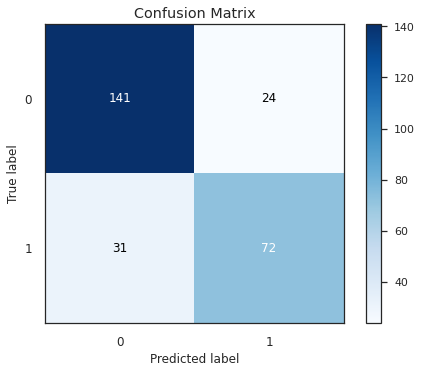

In [38]:
plot_confusion_matrix(y_valid, y_pred[2])

In [39]:
y_pred_clf = clf.predict(X_test)
y_pred_kneigh= model.predict(X_test)
y_pred_rndForest = model.predict(X_test)

In [40]:
#plot_confusion_matrix(y_train2, y_pred)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_kneigh})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
